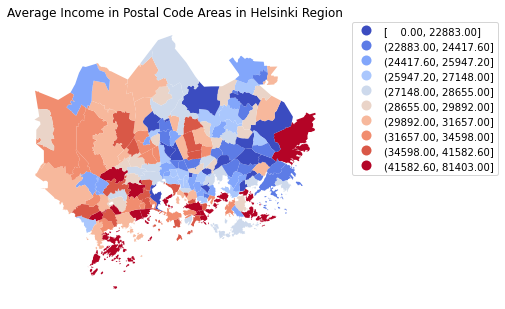

In [36]:
#Static map of Average Income in Postal Code Areas in Helsinki Region.

#This code imports the modules needed for the exercise.
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

#This code reads the shapefile of the postal code areas.
fp = 'data/PKS_Postinumeroalueet_manner_2019.shp'
p_areas = gpd.read_file(fp, sep= ';', delim_whitespace=True)

#This code reads the csv-file that contains the average income of the postal code areas and removes
#the name of the postal code areas leaving only the code. It also removes the NaN-values.
fp2 = 'data/2017.csv'
income = pd.read_csv(fp2, sep= ';',)
income = income.replace(to_replace='...', value=np.nan)
income = income.dropna()
income['code'] = income['code'].astype(str)
income['code'] = income['code'].str.slice(start=0, stop=5)
income['income'] = income['income'].astype(int)

#This code me<rges the income data to the postal code shapefile using the postal codes as keys.
p_areas.rename(columns={"Posno":"code"}, inplace=True)
p_areas = p_areas.merge(income, on="code")
 

#This code plots the map.
fig, ax = plt.subplots(figsize=(8,12))

p_areas.plot(ax=ax, column="income", scheme='quantiles', k=10, cmap= "coolwarm", legend=True)

ax.get_legend().set_bbox_to_anchor((1.56,1.02))

ax.set_title('Average Income in Postal Code Areas in Helsinki Region')

plt.axis('off')

plt.tight_layout()
outfp = 'docs/postal_code_income.png'
plt.savefig(outfp)

In [2]:
p_areas['geoid'] = p_areas.index.astype(str)
data = p_areas[['geoid', 'code', 'income', 'geometry']]
p_areas = data.to_json()

In [37]:
#Interactive map

m = folium.Map(location=[60.20,24.9], zoom_start=10, control_scale=True)

folium.Choropleth(
    geo_data=data,
    name='Average Income in Postal Code Areas in Helsinki Region',
    data=data,
    columns=['geoid','income'],
    key_on='feature.id',
    fill_color='RdYlBu',
    fill_opacity=0.6,
    line_opacity=0,
    line_color='black', 
    line_weight=10,
    highlight=True, 
    smooth_factor=1.0,
    legend_name= 'Average Income in Euros').add_to(m)

folium.features.GeoJson(data,name='Labels',
                        style_function=lambda x: {'color':'transparent','fillColor':'transparent','weight':0},
                        tooltip=folium.features.GeoJsonTooltip(fields=['income'],
                                                                aliases = ['Income'],
                                                                labels=True,
                                                                sticky=False)
                       ).add_to(m)
outfp = 'docs/income_interactive.html'
m.save(outfp)
m